In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
death = pd.read_csv('death_final.csv')
education = pd.read_csv('education_final.csv')
unemployment = pd.read_csv('unemployment_final.csv')
poverty = pd.read_csv('poverty_final.csv')
ranking = pd.read_csv('county_health_rank.csv')

In [3]:
death.head()

,FIPS,"Age-Adjusted Death Rate([rate note]) - deaths per 100,000"
0,0,152.4
1,12125,441.1
2,51640,384.3
3,20095,315.8
4,51580,293.1


In [4]:
education.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,47.7,31.1,10.6,10.7,33.5,...,24.9,20.3,19.6,28.6,27.4,24.4,12.0,27.0,28.9,32.1
1,1000,AL,Alabama,NaN,NaN,58.7,25.9,7.5,7.8,43.5,...,21.7,15.7,24.7,30.4,25.9,19.0,13.8,30.8,29.9,25.5
2,1001,AL,Autauga County,2.0,2.0,54.8,31.1,7.7,6.4,40.6,...,23.5,14.5,21.3,33.8,26.9,18.0,11.5,33.6,28.4,26.6
3,1003,AL,Baldwin County,3.0,2.0,59.4,26.7,7.4,6.5,39.7,...,24.6,16.8,18.0,29.6,29.3,23.1,9.2,27.7,31.3,31.9
4,1005,AL,Barbour County,6.0,6.0,68.8,19.0,4.9,7.3,55.1,...,16.7,11.8,35.3,32.4,21.3,10.9,26.8,35.6,26.0,11.6


In [5]:
unemployment.head()

,FIPS,Civilian_labor_force_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Unemployed_2020,Unemployment_rate_2020
0,0,"156,840,649","8,285,731",5.3,"158,674,951","7,725,602",4.9,"160,214,378","6,977,228",4.4,"161,441,134","6,288,584",3.9,"163,140,305","5,986,120",3.7,"160,611,064","12,933,704",8.1
1,1000,"2,152,295","131,852",6.1,"2,155,729","126,572",5.9,"2,172,455","99,059",4.6,"2,207,019","86,315",3.9,"2,237,278","67,883",3.0,"2,230,118","131,056",5.9
2,1001,"25,541","1,335",5.2,"25,710","1,315",5.1,"25,898","1,040",4.0,"26,081",941,3.6,"26,281",720,2.7,"25,838","1,262",4.9
3,1003,"87,493","4,874",5.6,"89,778","4,806",5.4,"91,838","3,844",4.2,"94,820","3,445",3.6,"97,424","2,711",2.8,"96,763","5,425",5.6
4,1005,"8,590",767,8.9,"8,334",696,8.4,"8,298",498,6.0,"8,379",430,5.1,"8,502",325,3.8,"8,587",605,7.0


In [6]:
poverty.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019
0,0,"39,490,096",12.3,"12,000,470",16.8,"65,712"
1,1000,"747,478",15.6,"233,890",21.9,"51,771"
2,1001,"6,723",12.1,"2,040",15.9,"58,233"
3,1003,"22,360",10.1,"6,323",13.5,"59,871"
4,1005,"5,909",27.1,"2,050",41.0,"35,972"


In [7]:
education = education.rename({'FIPS Code': 'FIPS'}, axis='columns')
death = death.rename({' FIPS': 'FIPS'}, axis='columns')
ranking.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Premature death numerator', 'Premature death denominator',
       ...
       'Frequent physical distress numerator',
       'Frequent physical distress denominator',
       'Frequent physical distress CI low',
       'Frequent physical distress CI high',
       'Frequent mental distress raw value',
       'Frequent mental distress numerator',
       'Frequent mental distress denominator',
       'Frequent mental distress CI low', 'Frequent mental distress CI high',
       'Diabetes prevalence raw value'],
      dtype='object', length=255)

In [8]:
ranking = ranking[['5-digit FIPS Code', 'Poor physical health days raw value', 'Adult smoking raw value',
                  'Food environment index raw value', 'Physical inactivity raw value', 'Excessive drinking raw value',
                  'Teen births raw value', 'Primary care physicians raw value', 'Ratio of population to primary care physicians.',
                  'Ratio of population to mental health providers.', 'Mammography screening raw value', 'Air pollution - particulate matter raw value',
                  'Percentage of households with high housing costs']]
ranking.head()


,5-digit FIPS Code,Poor physical health days raw value,Adult smoking raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Teen births raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Ratio of population to mental health providers.,Mammography screening raw value,Air pollution - particulate matter raw value,Percentage of households with high housing costs
0,1000,4.400458,0.215382,5.8,0.282,0.141781,33.113480,0.000654,1529.339623,1104.883726,0.42,11.0,NaN
1,1001,4.200578,0.191247,7.2,0.311,0.168780,26.524208,0.000415,2409.391304,6167.111111,0.44,11.7,0.132052
2,1003,4.098748,0.167955,8.0,0.238,0.167150,29.594009,0.000729,1372.125000,1096.020619,0.45,10.3,0.125693
3,1005,5.067438,0.215409,5.6,0.282,0.126987,45.092838,0.000385,2596.500000,12635.000000,0.46,11.5,0.136743
4,1007,4.363377,0.199164,7.6,0.349,0.159252,45.454545,0.000574,1741.769231,11334.000000,0.44,11.2,0.108081


In [9]:
ranking = ranking.rename({'5-digit FIPS Code': 'FIPS'}, axis='columns')


In [10]:
join_one = pd.merge(poverty, education, on = 'FIPS')
join_two = pd.merge(join_one, unemployment, on = 'FIPS')
all_data = pd.merge(join_two, death, on = 'FIPS')
all_data = pd.merge(all_data, ranking, on = 'FIPS')
all_data.shape

(3133, 61)

In [11]:
all_data = all_data.dropna()

In [12]:
all_data = all_data.rename({'Age-Adjusted Death Rate([rate note]) - deaths per 100,000': 'Death Rate'}, axis='columns')

In [13]:
all_data.isna().sum()

FIPS                                                0
POVALL_2019                                         0
PCTPOVALL_2019                                      0
POV017_2019                                         0
PCTPOV017_2019                                      0
                                                   ..
Ratio of population to primary care physicians.     0
Ratio of population to mental health providers.     0
Mammography screening raw value                     0
Air pollution - particulate matter raw value        0
Percentage of households with high housing costs    0
Length: 61, dtype: int64

In [14]:
all_data.replace(',','', regex=True, inplace=True)
all_data

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,...,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Teen births raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Ratio of population to mental health providers.,Mammography screening raw value,Air pollution - particulate matter raw value,Percentage of households with high housing costs
0,1001,6723,12.1,2040,15.9,58233,AL,Autauga County,2.0,2.0,...,7.2,0.311,0.168780,26.524208,0.000415,2409.391304,6167.111111,0.44,11.7,0.132052
1,1003,22360,10.1,6323,13.5,59871,AL,Baldwin County,3.0,2.0,...,8.0,0.238,0.167150,29.594009,0.000729,1372.125000,1096.020619,0.45,10.3,0.125693
2,1005,5909,27.1,2050,41.0,35972,AL,Barbour County,6.0,6.0,...,5.6,0.282,0.126987,45.092838,0.000385,2596.500000,12635.000000,0.46,11.5,0.136743
3,1007,4101,20.3,1147,25.9,47918,AL,Bibb County,1.0,1.0,...,7.6,0.349,0.159252,45.454545,0.000574,1741.769231,11334.000000,0.44,11.2,0.108081
4,1009,9324,16.3,2750,21.0,52902,AL,Blount County,1.0,1.0,...,8.5,0.285,0.153787,35.600555,0.000225,4438.769231,9668.833333,0.36,11.7,0.079459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,56037,3453,8.3,1075,10.1,80639,WY,Sweetwater County,5.0,8.0,...,7.7,0.256,0.203251,34.261671,0.000340,2944.333333,435.340000,0.34,5.1,0.070371
3129,56039,1396,6.0,236,5.7,98837,WY,Teton County,7.0,8.0,...,8.3,0.120,0.204511,11.641444,0.001207,828.250000,239.845361,0.45,4.9,0.113012
3130,56041,1699,8.5,541,9.6,70756,WY,Uinta County,7.0,8.0,...,7.3,0.235,0.160586,31.798673,0.000385,2596.625000,292.785714,0.31,5.9,0.087542
3131,56043,845,11.1,237,13.9,55122,WY,Washakie County,7.0,11.0,...,8.2,0.260,0.163430,27.649770,0.000486,2058.750000,288.000000,0.29,4.8,0.084535


In [15]:
all_data = all_data[all_data['Death Rate'] != '* ']

In [16]:
X = all_data.drop(columns=['Death Rate', 'State', 'Area name'])
y = all_data['Death Rate']

In [17]:
y = y.astype(float)
np.percentile(y, [50,75,80,85])

array([165.85, 182.2 , 186.24, 191.3 ])

In [18]:
dummies = pd.get_dummies(all_data['State'])
dummies.shape
dummies.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies = dummies.drop(columns=['UT'])

In [20]:
all_data.shape
all_data.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,...,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Teen births raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Ratio of population to mental health providers.,Mammography screening raw value,Air pollution - particulate matter raw value,Percentage of households with high housing costs
0,1001,6723,12.1,2040,15.9,58233,AL,Autauga County,2.0,2.0,...,7.2,0.311,0.168780,26.524208,0.000415,2409.391304,6167.111111,0.44,11.7,0.132052
1,1003,22360,10.1,6323,13.5,59871,AL,Baldwin County,3.0,2.0,...,8.0,0.238,0.167150,29.594009,0.000729,1372.125000,1096.020619,0.45,10.3,0.125693
2,1005,5909,27.1,2050,41.0,35972,AL,Barbour County,6.0,6.0,...,5.6,0.282,0.126987,45.092838,0.000385,2596.500000,12635.000000,0.46,11.5,0.136743
3,1007,4101,20.3,1147,25.9,47918,AL,Bibb County,1.0,1.0,...,7.6,0.349,0.159252,45.454545,0.000574,1741.769231,11334.000000,0.44,11.2,0.108081
4,1009,9324,16.3,2750,21.0,52902,AL,Blount County,1.0,1.0,...,8.5,0.285,0.153787,35.600555,0.000225,4438.769231,9668.833333,0.36,11.7,0.079459


Ok, since our dimensions are consistent, we can merge these tables. 

In [21]:
X = pd.merge(X, dummies, right_index=True, left_index=True)

In [22]:
X.shape
X.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970",...,SC,SD,TN,TX,VA,VT,WA,WI,WV,WY
0,1001,6723,12.1,2040,15.9,58233,2.0,2.0,54.8,31.1,...,0,0,0,0,0,0,0,0,0,0
1,1003,22360,10.1,6323,13.5,59871,3.0,2.0,59.4,26.7,...,0,0,0,0,0,0,0,0,0,0
2,1005,5909,27.1,2050,41.0,35972,6.0,6.0,68.8,19.0,...,0,0,0,0,0,0,0,0,0,0
3,1007,4101,20.3,1147,25.9,47918,1.0,1.0,73.1,19.4,...,0,0,0,0,0,0,0,0,0,0
4,1009,9324,16.3,2750,21.0,52902,1.0,1.0,70.5,22.7,...,0,0,0,0,0,0,0,0,0,0


## Preparing the Train-Test Split Along Response Variable with Differing Percentile

In [23]:
np.count_nonzero(y > 192.4) / len(y)

0.13956941351150706

In [24]:
np.count_nonzero(y > 186.78) / len(y)

0.1915367483296214

In [25]:
np.count_nonzero(y > 182.7) / len(y)

0.2431328878990349

In [26]:
X = X.astype(float)
y85 = (y>192.4)*1

In [27]:
y80 = (y>186.78)*1
y75 = (y>182.7)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train85, y_test85 = train_test_split(X, y85, test_size=0.2, random_state=42)
X_train, X_test, y_train80, y_test80 = train_test_split(X, y80, test_size=0.2, random_state=42)
X_train, X_test, y_train75, y_test75 = train_test_split(X, y75, test_size=0.2, random_state=42)



## Random Forests

Try with 85th percentile.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train85)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [30]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[453  11]
 [ 51  24]]

Accuracy: 0.8849721706864564


Try with 80th percentile. 

In [31]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train80)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [32]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[413  18]
 [ 69  39]]

Accuracy: 0.8385899814471243


Try with 75th percentile.

In [33]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train75)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [34]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[369  31]
 [ 75  64]]

Accuracy: 0.8033395176252319


## Scikit-Learn Log

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train85)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test85.index)

cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))


Confusion Matrix: 
 [[457   7]
 [ 71   4]]

Accuracy: 0.8552875695732839


In [37]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train80)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test80.index)

cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[425   6]
 [ 98  10]]

Accuracy: 0.8070500927643784


In [39]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train75)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [40]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test75.index)

cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[392   8]
 [128  11]]

Accuracy: 0.7476808905380334


## Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train85)


GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [42]:
y_pred = gbc.predict(X_test)
(y_test85 == y_pred).mean()

0.8812615955473099

In [43]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train80)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [44]:
y_pred = gbc.predict(X_test)
(y_test80 == y_pred).mean()

0.8608534322820037

In [45]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train75)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [46]:
y_pred = gbc.predict(X_test)
(y_test75 == y_pred).mean()

0.8033395176252319

## LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train85)

LinearDiscriminantAnalysis()

In [48]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[436  28]
 [ 38  37]]

Accuracy: 0.8775510204081632


In [49]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train80)

LinearDiscriminantAnalysis()

In [50]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[394  37]
 [ 50  58]]

Accuracy: 0.8385899814471243


In [51]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train75)

LinearDiscriminantAnalysis()

In [52]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[365  35]
 [ 65  74]]

Accuracy: 0.8144712430426716


## CV Decision Tree

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train85)


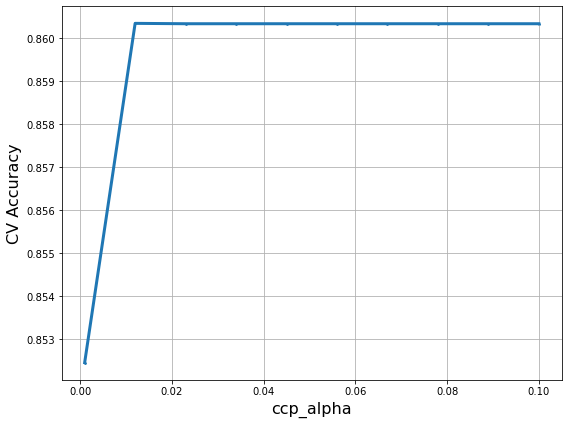

Best ccp_alpha {'ccp_alpha': 0.012}


In [54]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [55]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[434  30]
 [ 39  36]]

Accuracy: 0.8719851576994434


In [56]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train80)


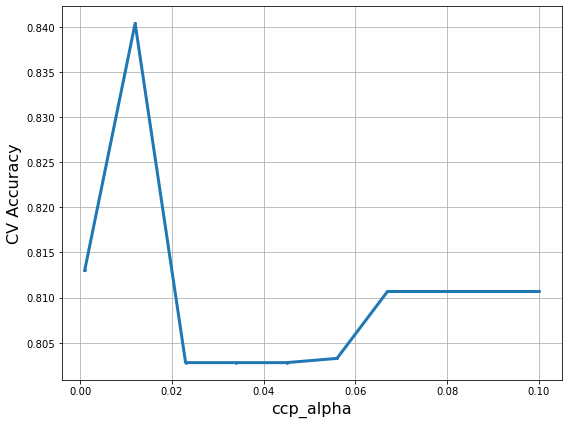

Best ccp_alpha {'ccp_alpha': 0.012}


In [57]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [58]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[409  22]
 [ 60  48]]

Accuracy: 0.8478664192949907


In [59]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train75)


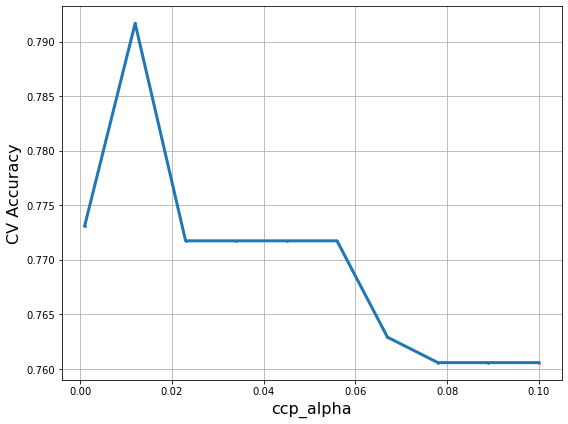

Best ccp_alpha {'ccp_alpha': 0.012}


In [60]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [61]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[377  54]
 [ 44  64]]

Accuracy: 0.8163265306122449


## Interpretable Statsmodels Log

In [62]:
X_train

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970",...,SC,SD,TN,TX,VA,VT,WA,WI,WV,WY
1627,30073.0,995.0,17.5,316.0,24.7,48542.0,7.0,11.0,44.6,35.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2171,40095.0,3030.0,18.2,886.0,23.6,45005.0,6.0,6.0,63.7,20.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2215,41029.0,29613.0,13.6,7908.0,18.0,56367.0,3.0,2.0,42.9,34.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,1123.0,6341.0,16.0,2101.0,25.9,47100.0,6.0,6.0,66.9,23.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3069,55063.0,13280.0,11.8,2175.0,9.6,59758.0,3.0,2.0,40.0,37.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,37021.0,31045.0,12.2,8016.0,17.3,55448.0,2.0,2.0,53.3,25.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256,26065.0,47655.0,17.3,9892.0,17.6,54704.0,2.0,2.0,35.0,34.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1292,26137.0,2429.0,10.0,739.0,14.8,52392.0,7.0,11.0,44.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,29001.0,4308.0,19.2,828.0,18.9,43044.0,7.0,8.0,47.4,26.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
import statsmodels.api as sm

log_reg1 = sm.Logit(y_train85, X_train.drop(columns=['WY', 'PCTPOVALL_2019'])).fit()


         Current function value: 0.224818
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
predis = (log_reg1.predict(X_test.drop(columns=['WY', 'PCTPOVALL_2019'])) > 0.5) * 1

In [65]:
np.mean(predis == y_test85)

0.8849721706864564

In [66]:
X_train_new, X_test_new = X_train.drop(columns=['WY', 'PCTPOVALL_2019']), X_test.drop(columns=['WY', 'PCTPOVALL_2019'])

In [67]:
log_reg2 = sm.Logit(y_train80, X_train_new).fit()

         Current function value: 0.269005
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
predis = (log_reg2.predict(X_test_new) > 0.5) * 1
np.mean(predis == y_test80)

0.8552875695732839

In [69]:
log_reg3 = sm.Logit(y_train75, X_train_new).fit()

         Current function value: 0.312564
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
predis = (log_reg3.predict(X_test_new) > 0.5) * 1
np.mean(predis == y_test75)

0.8163265306122449

In [71]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:             Death Rate   No. Observations:                 2155
Model:                          Logit   Df Residuals:                     2051
Method:                           MLE   Df Model:                          103
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.4440
Time:                        19:37:07   Log-Likelihood:                -484.48
converged:                      False   LL-Null:                       -871.42
Covariance Type:            nonrobust   LLR p-value:                2.259e-103
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
FIPS                                                                         0.0032   

In [72]:
X_refined = X[['TN', 'SD', 'SC', 'PA', 'OR', 'OK', 'OH', 'NV', 'NE', 'NC', 'MT', 'MS', 'MO', 'MI',
              'ME', 'MD', 'LA', 'KY', 'KS', 'IN', 'IL', 'ID', 'IA', 'GA', 'FL', 'CA', 'AL', 'AR',
              'Mammography screening raw value', 'Teen births raw value', 'Physical inactivity raw value',
              'Food environment index raw value', 'Adult smoking raw value', 'Poor physical health days raw value',
              'Unemployment_rate_2020', 'Unemployed_2020', 'Civilian_labor_force_2020', 'Unemployment_rate_2016',
              'Unemployed_2016', 'Percent of adults with less than a high school diploma, 2015-19', 
              'Percent of adults with a high school diploma only, 2015-19', "Percent of adults with a bachelor's degree or higher, 1990",
              "Percent of adults completing some college or associate's degree, 1990", "Percent of adults with a high school diploma only, 1990",
              "Percent of adults with less than a high school diploma, 1990", "Percent of adults with less than a high school diploma, 1980",
              "MEDHHINC_2019", 'FIPS']]



In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['TN', 'SD', 'SC', 'PA', 'OR', 'OK', 'OH', 'NV', 'NE', 'NC', 'MT', 'MS', 'MO', 'MI',
              'ME', 'MD', 'LA', 'KY', 'KS', 'IN', 'IL', 'ID', 'IA', 'GA', 'FL', 'CA', 'AL', 'AR',
              'Mammography screening raw value', 'Teen births raw value', 'Physical inactivity raw value',
              'Food environment index raw value', 'Adult smoking raw value', 'Poor physical health days raw value',
              'Unemployment_rate_2020', 'Unemployed_2020', 'Civilian_labor_force_2020', 'Unemployment_rate_2016',
              'Unemployed_2016', 'Percent of adults with less than a high school diploma, 2015-19', 
              'Percent of adults with a high school diploma only, 2015-19', "Percent of adults with a bachelor's degree or higher, 1990",
              "Percent of adults completing some college or associate's degree, 1990", "Percent of adults with a high school diploma only, 1990",
              "Percent of adults with less than a high school diploma, 1990", "Percent of adults with less than a high school diploma, 1980",
              "MEDHHINC_2019", 'FIPS']
VIF(X_refined, cols)


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


TN                                                                           1.457012
SD                                                                           1.141846
SC                                                                           1.164313
PA                                                                           1.350809
OR                                                                           1.112121
OK                                                                           1.424082
OH                                                                           1.449623
NV                                                                           1.093156
NE                                                                           1.407851
NC                                                                           1.342980
MT                                                                           1.160485
MS                                                    

In [74]:
X_refined = X_refined[['TN', 'SD', 'SC', 'PA', 'OR', 'OK', 'OH', 'NV', 'NE', 'NC', 'MT', 'MS', 'MO', 'MI',
              'ME', 'MD', 'LA', 'KY', 'KS', 'IN', 'IL', 'ID', 'IA', 'GA', 'FL', 'CA', 'AL', 'AR',
              'Mammography screening raw value', 'Teen births raw value', 'Physical inactivity raw value',
              'Food environment index raw value', 'Adult smoking raw value', 
              'Unemployment_rate_2020', 'Unemployment_rate_2016',
              'Percent of adults with less than a high school diploma, 2015-19', 
              'Percent of adults with a high school diploma only, 2015-19', 
              "MEDHHINC_2019", 'FIPS']]
cols = ['TN', 'SD', 'SC', 'PA', 'OR', 'OK', 'OH', 'NV', 'NE', 'NC', 'MT', 'MS', 'MO', 'MI',
              'ME', 'MD', 'LA', 'KY', 'KS', 'IN', 'IL', 'ID', 'IA', 'GA', 'FL', 'CA', 'AL', 'AR',
              'Mammography screening raw value', 'Teen births raw value', 'Physical inactivity raw value',
              'Food environment index raw value', 'Adult smoking raw value',
              'Unemployment_rate_2020', 'Unemployment_rate_2016',
              'Percent of adults with less than a high school diploma, 2015-19', 
              'Percent of adults with a high school diploma only, 2015-19', 
              "MEDHHINC_2019", 'FIPS']
VIF(X_refined, cols)

TN                                                                 1.299856
SD                                                                 1.093429
SC                                                                 1.107853
PA                                                                 1.211396
OR                                                                 1.068371
OK                                                                 1.296019
OH                                                                 1.264500
NV                                                                 1.048040
NE                                                                 1.262126
NC                                                                 1.207110
MT                                                                 1.126844
MS                                                                 1.485949
MO                                                                 1.577272
MI          

In [75]:
X_train_refined, X_test_refined, y_train85, y_test85 = train_test_split(X_refined, y85, test_size=0.2, random_state=42)
X_train_refined, X_test_refined, y_train80, y_test80 = train_test_split(X_refined, y80, test_size=0.2, random_state=42)
X_train_refined, X_test_refined, y_train75, y_test75 = train_test_split(X_refined, y75, test_size=0.2, random_state=42)



## Try Statsmodels Logit with Refined Features

In [76]:
log_reg = sm.Logit(y_train85, X_train_refined).fit()


         Current function value: 0.259052
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1

In [78]:
np.mean(predis == y_test85)

0.8905380333951762

In [79]:
log_reg = sm.Logit(y_train80, X_train_refined).fit()

         Current function value: 0.308709
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1
np.mean(predis == y_test80)

0.849721706864564

In [81]:
log_reg = sm.Logit(y_train75, X_train_refined).fit()

Optimization terminated successfully.
         Current function value: 0.363975
         Iterations 8


In [82]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1
np.mean(predis == y_test75)

0.8126159554730983

## Now, try Random Forests model with refined features.

In [83]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train85)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [84]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[446  18]
 [ 42  33]]

Accuracy: 0.8886827458256029


In [85]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train80)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [86]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[411  20]
 [ 60  48]]

Accuracy: 0.8515769944341373


In [87]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train75)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [88]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[369  31]
 [ 72  67]]

Accuracy: 0.8089053803339518


## Now, try Boosting model with refined features.

In [89]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train_refined, y_train85)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [90]:
y_pred = gbc.predict(X_test_refined)
(y_test85 == y_pred).mean()

0.8738404452690167

In [91]:
gbc.fit(X_train_refined, y_train80)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [92]:
y_pred = gbc.predict(X_test_refined)
(y_test80 == y_pred).mean()

0.8330241187384044

In [93]:
gbc.fit(X_train_refined, y_train75)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [94]:
y_pred = gbc.predict(X_test_refined)
(y_test75 == y_pred).mean()

0.8311688311688312

## LDA with Refined Features

In [95]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train85)

LinearDiscriminantAnalysis()

In [96]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[440  24]
 [ 41  34]]

Accuracy: 0.8794063079777366


In [97]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train80)

LinearDiscriminantAnalysis()

In [98]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[401  30]
 [ 61  47]]

Accuracy: 0.8311688311688312


In [99]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train75)

LinearDiscriminantAnalysis()

In [100]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[372  28]
 [ 74  65]]

Accuracy: 0.8107606679035251


## And now Scikit-Learn's Logistic

In [101]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train85)

LogisticRegression(random_state=88)

In [102]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test85.index)

cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[446  18]
 [ 54  21]]

Accuracy: 0.8664192949907236


In [103]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train80)

LogisticRegression(random_state=88)

In [104]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test80.index)

cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[409  22]
 [ 70  38]]

Accuracy: 0.8293135435992579


In [105]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train75)

LogisticRegression(random_state=88)

In [106]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test75.index)

cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[362  38]
 [ 82  57]]

Accuracy: 0.7773654916512059


## Now, Try CART on the Refined Data

In [107]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train85)


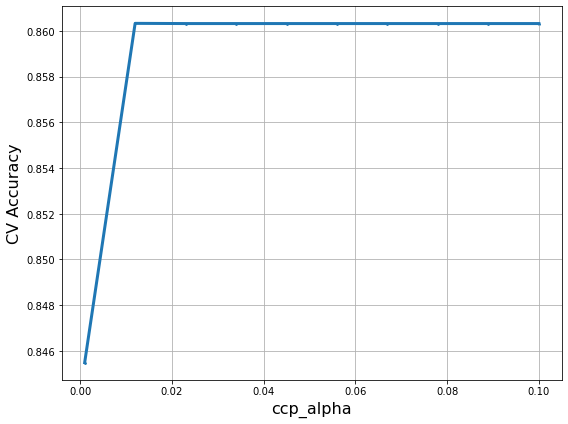

Best ccp_alpha {'ccp_alpha': 0.012}


In [108]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [109]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[434  30]
 [ 39  36]]

Accuracy: 0.8719851576994434


In [110]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train80)


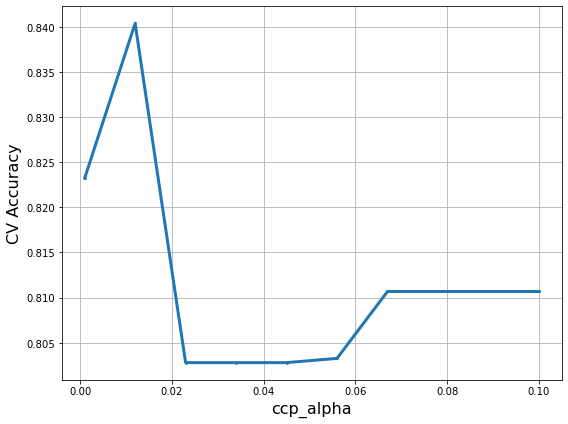

Best ccp_alpha {'ccp_alpha': 0.012}


In [111]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [112]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[409  22]
 [ 60  48]]

Accuracy: 0.8478664192949907


In [113]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train75)


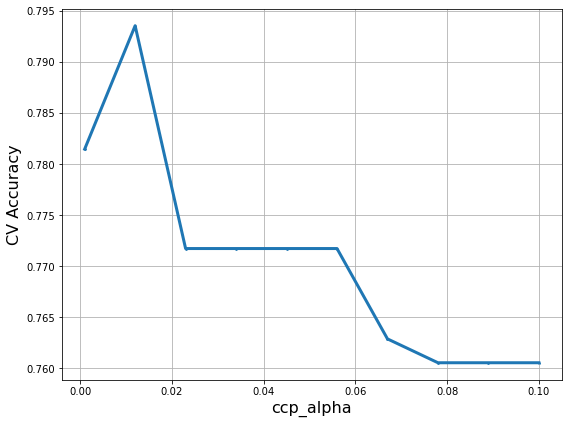

Best ccp_alpha {'ccp_alpha': 0.012}


In [114]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [115]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[361  39]
 [ 60  79]]

Accuracy: 0.8163265306122449


## Evaluating Logistic Model

         Current function value: 0.259052
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


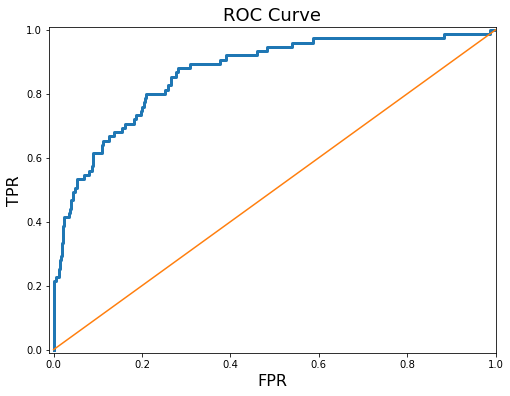

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

log_reg = sm.Logit(y_train85, X_train_refined).fit()

logpredictions = log_reg.predict(X_test_refined) 
fpr, tpr, _ = roc_curve(y_test85, logpredictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc)) 
plt.plot([0, 1], [0, 1])
plt.show()

In [117]:
roc_auc

0.8656896551724138

In [118]:
cutoffs = np.linspace(0,1,100)

accuracy_array = np.empty(0)

for i in np.arange(len(cutoffs)): 
    preds = (log_reg.predict(X_test_refined) > cutoffs[i]) * 1
    acc = np.count_nonzero(y_test85 == preds) / len(preds)
    accuracy_array = np.append(accuracy_array, acc)

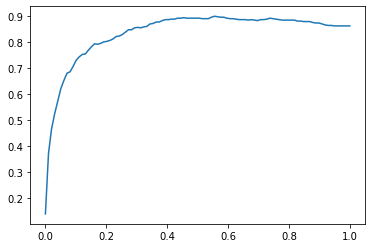

In [119]:
plt.plot(cutoffs, accuracy_array)

In [120]:
accuracy_array[np.argmax(accuracy_array)], cutoffs[np.argmax(accuracy_array)]

(0.8979591836734694, 0.5555555555555556)

## Random Forest Cross Validation 

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
max_features = np.arange(1, 17) / 16
random_grid = {'max_features': max_features}

In [123]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 16, cv = 5, verbose=2, random_state=42)

rf_random.fit(X_train_refined, y_train85)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................................max_features=0.0625; total time=   0.3s
[CV] END ................................max_features=0.0625; total time=   0.3s
[CV] END ................................max_features=0.0625; total time=   0.3s
[CV] END ................................max_features=0.0625; total time=   0.3s
[CV] END ................................max_features=0.0625; total time=   0.3s
[CV] END .................................max_features=0.125; total time=   0.3s
[CV] END .................................max_features=0.125; total time=   0.3s
[CV] END .................................max_features=0.125; total time=   0.3s
[CV] END .................................max_features=0.125; total time=   0.3s
[CV] END .................................max_features=0.125; total time=   0.3s
[CV] END ................................max_features=0.1875; total time=   0.4s
[CV] END ................................max_fea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=16,
                   param_distributions={'max_features': array([0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   ,
       0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375, 1.    ])},
                   random_state=42, verbose=2)

In [124]:
rf_random.best_params_

{'max_features': 0.0625}

In [125]:
max_features = np.arange(1, 15)
random_grid = {'min_samples_leaf': max_features}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 16, cv = 5, verbose=2, random_state=42)

rf_random.fit(X_train_refined, y_train85)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 14 is smaller than n_iter=16. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .................................min_samples_leaf=1; total time=   0.4s
[CV] END .................................min_samples_leaf=1; total time=   0.4s
[CV] END .................................min_samples_leaf=1; total time=   0.4s
[CV] END .................................min_samples_leaf=1; total time=   0.4s
[CV] END .................................min_samples_leaf=1; total time=   0.3s
[CV] END .................................min_samples_leaf=2; total time=   0.3s
[CV] END .................................min_samples_leaf=2; total time=   0.3s
[CV] END .................................min_samples_leaf=2; total time=   0.4s
[CV] END .................................min_samples_leaf=2; total time=   0.3s
[CV] END .................................min_samples_leaf=2; total time=   0.3s
[CV] END .................................min_samples_leaf=3; total time=   0.3s
[CV] END .................................min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=16,
                   param_distributions={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=42, verbose=2)

In [126]:
rf_random.best_params_

{'min_samples_leaf': 7}

In [127]:
rf = RandomForestClassifier(max_features=0.125, min_samples_leaf=3, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train85)

RandomForestClassifier(max_features=0.125, min_samples_leaf=3, n_estimators=500,
                       random_state=88)

In [128]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[448  16]
 [ 45  30]]

Accuracy: 0.8868274582560297


## Bootstrapping

In [129]:
pip install bootstrapped

Note: you may need to restart the kernel to use updated packages.


In [130]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [131]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [144]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

def accuracy(predictions, y_test, y_train): 
    ACC = np.count_nonzero(predictions == y_test) / len(y_test)
    return ACC

def accuracy1(predictions, y_test, y_train): 
    ACC = np.count_nonzero(((predictions >0.5555)*1) == y_test) / len(y_test)
    return ACC

In [145]:
bs_output1 = bootstrap_validation(X_test_refined,y_test85,y_train85,rf,
                                 metrics_list=[accuracy],
                                 sample = 1000)

(1000, 1)


(-0.05, 0.05)

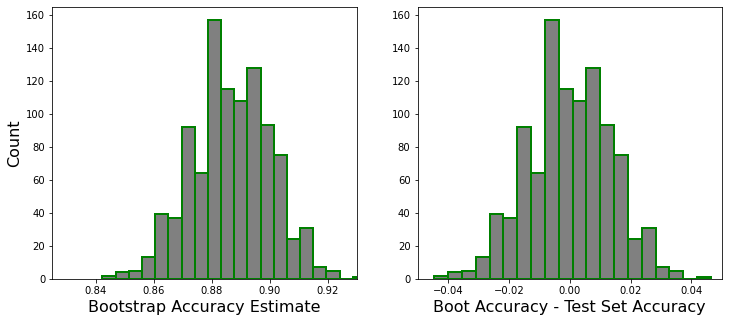

In [146]:
rf_test_accuracy = 0.8868274582560297
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output1.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.825,0.93])
axs[1].hist(bs_output1.iloc[:,0]-rf_test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [147]:
# The 95% confidence interval
CI = [0,0]
CI_0 = np.quantile(bs_output1.iloc[:,0]-rf_test_accuracy,np.array([0.025,0.975]))
CI[0] = rf_test_accuracy - CI_0[1]
CI[1] = rf_test_accuracy - CI_0[0]
print("The 95-percent confidence interval of accuracy is %s" % CI_0) #0.5,0.64

The 95-percent confidence interval of accuracy is [-0.02597403  0.02597403]


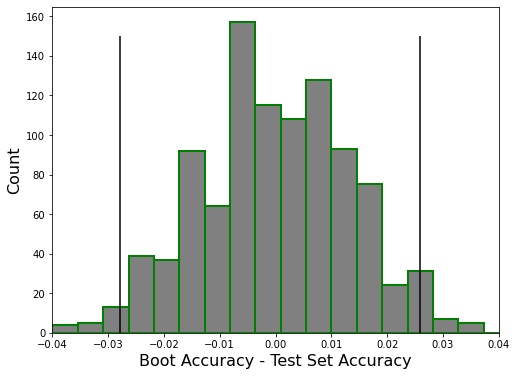

In [148]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output1.iloc[:,0]-rf_test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([-0.040,0.040])
axs.vlines(x=-0.02782931, ymin = 0, ymax =150, color = "black")
axs.vlines(x=0.02597403, ymin = 0, ymax =150, color = "black")


In [149]:
bs_output = bootstrap_validation(X_test_refined,y_test85,y_train85,log_reg,
                                 metrics_list=[accuracy1],
                                 sample = 1000)

(1000, 1)


(-0.05, 0.05)

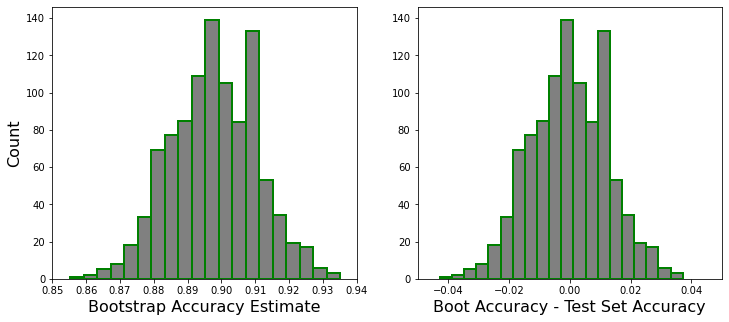

In [150]:
log_test_accuracy = 0.8979591836734694
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.850,0.94])
axs[1].hist(bs_output.iloc[:,0]-log_test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [151]:
# The 95% confidence interval
CI = [0,0]
CI_0 = np.quantile(bs_output.iloc[:,0]-log_test_accuracy,np.array([0.025,0.975]))
CI[0] = rf_test_accuracy - CI_0[1]
CI[1] = rf_test_accuracy - CI_0[0]
print("The 95-percent confidence interval of accuracy is %s" % CI_0) #0.5,0.64

The 95-percent confidence interval of accuracy is [-0.02411874  0.02597403]


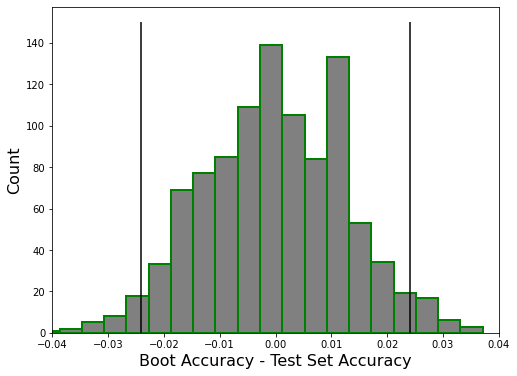

In [152]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0]-log_test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([-0.040,0.040])
axs.vlines(x=-0.02411874, ymin = 0, ymax =150, color = "black")
axs.vlines(x=0.02411874, ymin = 0, ymax =150, color = "black")